# 基于numpy实现线性回归

In [1]:
import numpy as np

def loss_func(X, y, w, b):
    train_nums = X.shape[0]
    feature_nums = X.shape[1]    
    # 模型公式f(x)= w*x + b
    y_hat = np.dot(X, w) + b    
    # 损失函数
    loss = np.sum((y_hat-y)**2)/train_nums    
    # 参数的偏导
    dw = 2 * np.dot(X.T, (y_hat-y))
    db = 2 * np.sum((y_hat-y))   
    dw = dw/train_nums
    db = db/train_nums
    return y_hat, loss, dw, db

In [2]:
#初始化权重：w 和 b
def initialize_params(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [3]:
#基于梯度下降的模型训练过程：
def gradient_descent(X, y, learning_rate, epochs):
    w, b = initialize_params(X.shape[1])  
    loss_list = []  
    for i in range(1, epochs):        
        # 计算当前预测值、损失和参数偏导
        y_hat, loss, dw, db = loss_func(X, y, w, b)  
        loss_list.append(loss)      
        # 基于梯度下降的参数更新过程
        if i%100000==0:
            learning_rate=learning_rate*0.8
        w += -learning_rate * dw
        b += -learning_rate * db        
        # 打印迭代次数和损失

        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
            print('epoch %d learning_rate %f' % (i, learning_rate))
               
        # 保存参数
        params = {            
            'w': w,            
            'b': b
        }        
        
        # 保存梯度
        grads = {            
            'dw': dw,            
            'db': db
        }    
            
    return loss_list, loss, params, grads

In [4]:
#以上便是线性回归模型的基本实现过程。下面以 sklearn 中的 diabetes 数据集为例进行简单的训练。

In [5]:
#数据准备：
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 

# 打乱数据
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)

# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


In [6]:
#执行训练：
loss_list, loss, params, grads = gradient_descent(X_train, y_train, 0.5, 100000)

epoch 10000 loss 2864.567324
epoch 10000 learning_rate 0.500000
epoch 20000 loss 2858.484056
epoch 20000 learning_rate 0.500000
epoch 30000 loss 2854.445879
epoch 30000 learning_rate 0.500000
epoch 40000 loss 2851.765062
epoch 40000 learning_rate 0.500000
epoch 50000 loss 2849.985346
epoch 50000 learning_rate 0.500000
epoch 60000 loss 2848.803845
epoch 60000 learning_rate 0.500000
epoch 70000 loss 2848.019481
epoch 70000 learning_rate 0.500000
epoch 80000 loss 2847.498765
epoch 80000 learning_rate 0.500000
epoch 90000 loss 2847.153077
epoch 90000 learning_rate 0.500000


In [7]:
print(params)

{'w': array([[  -0.86473399],
       [-264.24734793],
       [ 485.19146599],
       [ 336.05439516],
       [-747.05584309],
       [ 417.67713741],
       [  95.48517373],
       [ 219.70910411],
       [ 716.12195039],
       [  82.48136561]]), 'b': 151.27786131503402}


In [8]:
#下面定义一个预测函数对测试集结果进行预测：
def predict(X, params):
    w = params['w']
    b = params['b']

    y_pred = np.dot(X, w) + b    
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[120.03576734],
       [163.39385018],
       [134.84083758],
       [100.07956453],
       [142.88096289]])

In [9]:
#利用 matplotlib 对预测结果和真值进行展示：
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

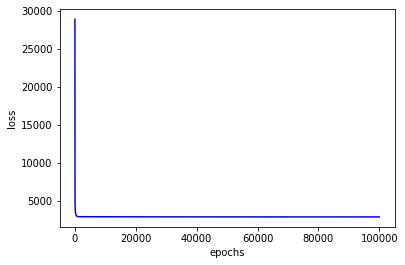

In [10]:
#可见全变量的数据对于线性回归模型的拟合并不好，一来数据本身的分布问题，二来简单的线性模型对于该数据拟合效果差。
#当然，我们只是为了演示线性回归模型的基本过程，不要在意效果。
#训练过程中损失的下降：
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [11]:
# 封装一个线性回归类
# 笔者对上述过程进行一个简单的 class 封装，其中加入了自定义的交叉验证过程进行训练：
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes


class lr_model():
    def __init__(self):
        self.params = dict()
        self.grads = dict()

    def prepare_data(self):
        data = load_diabetes().data
        target = load_diabetes().target
        X, y = shuffle(data, target, random_state=42)
        X = X.astype(np.float32)
        y = y.reshape((-1, 1))
        data = np.concatenate((X, y), axis=1)
        return data

    def initialize_params(self, dims):
        w = np.zeros((dims, 1))
        b = 0
        return w, b

    def loss_func(self, X, y, w, b):
        train_nums = X.shape[0]
        feature_nums = X.shape[1]
        # 模型公式f(x)= w*x + b
        y_hat = np.dot(X, w) + b
        # 损失函数
        loss = np.sum((y_hat - y) ** 2) / train_nums
        # 参数的偏导
        dw = 2 * np.dot(X.T, (y_hat - y))
        db = 2 * np.sum((y_hat - y))
        dw = dw / train_nums
        db = db / train_nums
        return y_hat, loss, dw, db

    # 带L2正则项
    def loss_func_l2(self, X, y, w, b, alpha=1e-5):
        train_nums = X.shape[0]
        feature_nums = X.shape[1]
        # 模型公式f(x)= w*x + b
        y_hat = np.dot(X, w) + b + alpha * np.dot(w.T, w)
        # 损失函数
        loss = np.sum((y_hat - y) ** 2) / train_nums
        # 参数的偏导
        dw = 2 * np.dot(X.T, (y_hat - y))
        db = 2 * np.sum((y_hat - y))
        dw = dw / train_nums
        db = db / train_nums
        return y_hat, loss, dw, db

    # 基于梯度下降的模型训练过程：
    def gradient_descent(self, X, y, learning_rate, epochs):
        w, b = self.initialize_params(X.shape[1])
        loss_list = []
        for i in range(1, epochs):
            # 计算当前预测值、损失和参数偏导
            y_hat, loss, dw, db = self.loss_func(X, y, w, b)
            loss_list.append(loss)
            # 基于梯度下降的参数更新过程
            if i % 10000 == 0:
                learning_rate = learning_rate * 0.5
            w += -learning_rate * dw
            b += -learning_rate * db
            # 打印迭代次数和损失

            if i % 10000 == 0:
                print('epoch %d loss %f' % (i, loss))
                print('epoch %d learning_rate %f' % (i, learning_rate))

            # 保存参数
            self.params = {
                'w': w,
                'b': b
            }

            # 保存梯度
            self.grads = {
                'dw': dw,
                'db': db
            }

        params, grads= self.params, self.grads
        return loss, params, grads

    def predict(self, X, params):
        w = self.params['w']
        b = self.params['b']
        y_pred = np.dot(X, w) + b
#         print("y_pred:", y_pred)
        return y_pred

    def linear_cross_validation(self, data, k, randomize=True):
        if randomize:
            data = list(data)
            shuffle(data)

        slices = [data[i::k] for i in range(k)]
        for i in range(k):
            validation = slices[i]
            train = [dt for s in slices if s is not validation for dt in s]
            train = np.array(train)
            validation = np.array(validation)
            yield train, validation


if __name__ == '__main__':
    lr = lr_model()
    data = lr.prepare_data()

    for train, validation in lr.linear_cross_validation(data, 5):
        X_train = train[:, :10]
        y_train = train[:, -1].reshape((-1, 1))
        X_valid = validation[:, :10]
        y_valid = validation[:, -1].reshape((-1, 1))

        loss5 = []
        loss, params, grads = lr.gradient_descent(X_train, y_train, learning_rate=0.3, epochs=10000)
        loss5.append(loss)
        score = np.mean(loss5)
        print('five kold cross validation score is', score)
        y_pred = lr.predict(X_valid, params)
        valid_score = np.sum(((y_pred - y_valid) ** 2)) / len(X_valid)
#         print("y_valid:", y_valid)
        print('valid score is', valid_score)

five kold cross validation score is 2768.9837315034647
valid score is 3424.3103942523876
five kold cross validation score is 2622.6972860346455
valid score is 3981.656533144954
five kold cross validation score is 2946.642865591133
valid score is 2675.130340063957
five kold cross validation score is 2975.560410497327
valid score is 2549.6305140934614
five kold cross validation score is 2989.619578276991
valid score is 2484.504069108119
